## Примеры к занятию N8 (31.03.2016)

## Основные темы:

+ Чтение/запись в файлыф формата MS EXCEL;
+ Формат хранения гидрометеорологических данных NetCDF.

### План занятия

1. **Работа с форматами MS Excel "xls/xlsx"**
    + обзор формата MS Excel
    + модули xlrd/xlwt;
    + возможности модуля pandas для работы с форматами xls/xlsx.
2. **Формат хранения NetCDF**
    + обзор формата;
    + классическая модель данных netcdf3;
    + новая модель данных netcdf4;
    + модуль netcdf4;

### Cсылки

+ [Обзор модулей xlrd/xlwt](http://progeoru.blogspot.ru/search/label/excel)

+ [Примеры работы с форматом netcdf с помощью python-модуля netcdf4](http://unidata.github.io/netcdf4-python/#section4)

+ [Обзор работы с netcdf с помощью python и не только](http://progeoru.blogspot.ru/search/label/netcdf)

In [1]:
%matplotlib inline

MS Excel sheets: [u'Temp (C)']
<type 'list'> 1
Sheet name: Temp (C)
Number of rows: 143 Number of cells in choosed column: 143
Number of columns: 5 Number of cells in choosed row: 5
[u'Average Global Temperature, 1880-2014', '', '', '', '']
['', '', '', '', '']
Type of cell <class 'xlrd.sheet.Cell'>
XL_CELL_TEXT	1 (Unicode string): 1
Cell value: Average Global Temperature, 1880-2014
XL_CELL_NUMBER 2 (float): 2
Cell value: 1880.0
----------------------------------------
[u'Average Global Temperature, 1880-2014', '', u'Year', '', '', 1880.0, 1881.0, 1882.0, 1883.0, 1884.0, 1885.0, 1886.0, 1887.0, 1888.0, 1889.0, 1890.0, 1891.0, 1892.0, 1893.0, 1894.0, 1895.0, 1896.0, 1897.0, 1898.0, 1899.0, 1900.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0, 1908.0, 1909.0, 1910.0, 1911.0, 1912.0, 1913.0, 1914.0, 1915.0, 1916.0, 1917.0, 1918.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0

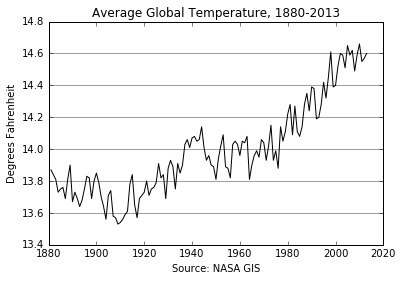

In [2]:
# ЛИСТИНГ 1 xlrd

import numpy as np
import xlrd

path = u'book_tgt_climate_9.xlsx' # имя и путь к файлу
wb = xlrd.open_workbook(path) # открываем файл и передаём его как объект в wb

''' Методы sheet_names показывает список имён доступных для работы листов файла'''
sheets = wb.sheet_names()
print 'MS Excel sheets:', sheets
print type(sheets), len(sheets)

''' Передаём первый (и едиственный в данном случае) лист как объект sh '''
sh = wb.sheet_by_name(sheets[0])

print 'Sheet name:',sh.name # выведем имя текущего листа
print 'Number of rows:',sh.nrows, 'Number of cells in choosed column:',len(sh.col(0)) # число строк разными способами
print 'Number of columns:', sh.ncols, 'Number of cells in choosed row:', len(sh.row(0)) # число столбцов разными способами

''' Передаём колонки в виде списков year и temp 
 Важно передать именно values. Иначе* будет передан список из особого класса ячеек Cells
'''
year = sh.col_values(0)
temp = sh.col_values(1)

'''Для примера - данные из строк'''
print sh.row_values(0)
print sh.row_values(1)

# * ИНАЧЕ
cell = sh.col(0)[0]
print 'Type of cell', type(cell)
print 'XL_CELL_TEXT	1 (Unicode string):', cell.ctype
print 'Cell value:', cell.value

cell = sh.col(0)[5]
print 'XL_CELL_NUMBER 2 (float):', cell.ctype
print 'Cell value:', cell.value


# Выбираем нужные строки
print '----------------------------------------'
print year
print temp
row1 = 6
row2 = 139

for v in year:
    if type(v) == float: 
        row1 = year.index(v) + 1
        break
for v in year:
    if type(v) == float: 
        row2 = year.index(v)
        
print 'AUTo rows', row1, row2

year = sh.col_values(0,row1,row2)
temp = sh.col_values(1,row1,row2)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(year,temp,'k-')
ax.set_xlabel('Source: NASA GIS')
ax.set_ylabel('Degrees Fahrenheit')
ax.set_title('Average Global Temperature, 1880-2013')
ax.grid(axis='y', color='k', linestyle='-', alpha=0.75, linewidth=0.5)

plt.show()

In [3]:
# ЛИСТИНГ 2 Модуль xlwt

import numpy as np
from xlwt import Workbook

def wr_xls(x, name, debug=False):
    '''
    Saves matrix 'X' in 'name.xls' file

    Parameters
    ----------
    x : (numpy.ndarray)
        Input matrix (2D array)

    name : (str)
        The name of future xls file

    debug: (bool), optional

    Returns
    -------
    File : (xls)
        Xls file with matrix values in it
    '''
    book = Workbook()
    sheet = book.add_sheet('Sheet 1')

    for row, array in enumerate(x):
        print 'Row:',row, 'Array:', array
        if debug:
            print (row, array)
        if np.size(array) == 1:
            col = 0
            sheet.write(row, col, array)
        else:
            for col, value in enumerate(array):
                sheet.write(row, col, value)

    name = "%s.xls" % (name)
    book.save(name)

shape1 = (20, 10)
#x = np.random.random(shape1)
x = np.arange(200).reshape(shape1)
wr_xls(x, 'test_rand_excel')

Row: 0 Array: [0 1 2 3 4 5 6 7 8 9]
Row: 1 Array: [10 11 12 13 14 15 16 17 18 19]
Row: 2 Array: [20 21 22 23 24 25 26 27 28 29]
Row: 3 Array: [30 31 32 33 34 35 36 37 38 39]
Row: 4 Array: [40 41 42 43 44 45 46 47 48 49]
Row: 5 Array: [50 51 52 53 54 55 56 57 58 59]
Row: 6 Array: [60 61 62 63 64 65 66 67 68 69]
Row: 7 Array: [70 71 72 73 74 75 76 77 78 79]
Row: 8 Array: [80 81 82 83 84 85 86 87 88 89]
Row: 9 Array: [90 91 92 93 94 95 96 97 98 99]
Row: 10 Array: [100 101 102 103 104 105 106 107 108 109]
Row: 11 Array: [110 111 112 113 114 115 116 117 118 119]
Row: 12 Array: [120 121 122 123 124 125 126 127 128 129]
Row: 13 Array: [130 131 132 133 134 135 136 137 138 139]
Row: 14 Array: [140 141 142 143 144 145 146 147 148 149]
Row: 15 Array: [150 151 152 153 154 155 156 157 158 159]
Row: 16 Array: [160 161 162 163 164 165 166 167 168 169]
Row: 17 Array: [170 171 172 173 174 175 176 177 178 179]
Row: 18 Array: [180 181 182 183 184 185 186 187 188 189]
Row: 19 Array: [190 191 192 193 194 1

In [14]:
# ЛИСТИНГ 3.5 Pandas to MS Excel

import numpy as np
import pandas as pd

# Чтение xlsx файла через ФУНКЦИЮ read_excel
path = u'book_tgt_climate_9.xlsx' # имя и путь к файлу
z = pd.read_excel(path, header=None, skiprows=5, skip_footer=3)
print u'', type(z), z.shape
#print u'Верхняя часть таблицы DataFrame', z.head
#print u'Нижняя часть таблицы DataFrame', z.tail

print u'Столбцы таблицы: ', z.columns
print u'Строки таблицы: ', z.index 

z.columns = ['year', 'temp']

# Запись в xlsx файл через МЕТОД таблицы DataFrame
shape1 = (20, 7)
x = np.random.random(shape1)
x[3, :] = [1, 1 , 2, 2, 9, 9, 13]
x = pd.DataFrame(x)
x.to_excel('pd_w_excel.xlsx')

 <class 'pandas.core.frame.DataFrame'> (135, 2)
Столбцы таблицы:  Int64Index([0, 1], dtype='int64')
Строки таблицы:  Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            125, 126, 127, 128, 129, 130, 131, 132, 133, 134],
           dtype='int64', length=135)


In [6]:
# ЛИСТИНГ 3 Информация о netcdf-файле

import os

import numpy as np
from matplotlib import rcParams
import netCDF4 as nc
#from netCDF4 import num2date

param = 'air'
ncname = '{}.mon.mean.nc'.format(param)
ncfile = nc.Dataset(ncname, 'r')
   
print u'Тип данных для объекта ncfile: ', type(ncfile)

print u'Описание объекта ncfile: ', ncfile.description

#print ncfile.variables['air']
print u'Модель данных: ', ncfile.data_model

print u'Существующие группы: ', ncfile.groups

# узнать измерения
print '************************'
print u'Измерения - DIMENSIONS'
print '************************'
for i in ncfile.dimensions:
    print i
    print ncfile.dimensions[i]
print '************************'
print u'Переменные - VARIABLES'
print '************************'

# имена переменных
for i in ncfile.variables:
    print i, i.upper()
    print ncfile.variables[i]

Тип данных для объекта ncfile:  <type 'netCDF4._netCDF4.Dataset'>
Описание объекта ncfile:   Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
Модель данных:  NETCDF4_CLASSIC
Существующие группы:  OrderedDict()
************************
Измерения - DIMENSIONS
************************
level
<type 'netCDF4._netCDF4.Dimension'>: name = 'level', size = 17

lat
<type 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 73

lon
<type 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144

time
<type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 805

************************
Переменные - VARIABLES
************************
level LEVEL
<type 'netCDF4._netCDF4.Variable'>
float32 level(level)
    units: millibar
    long_name: Level
    positive: down
    GRIB_id: 100
    GRIB_name: hPa
    actual_range: [ 1000.    10.]
    axis: Z
unlimited dimensions: 
current shape = (17,)
filling on, default _FillValue o

## Время в netcdf

Обычно время (time) является одним из самых востребованных измерений (dimension) при работе с netcdf файлами. Удобно именно время делать осью без ограничений по длине (unlimited). Но в отличие от переменных (солёность, температура, давление и др.), формат времени по умолчанию **далёк** от привычного **ГОД-МЕСЯЦ-ДЕНЬ-ЧАС-МИН-СЕК**. 

В netcdf отсчёты времени ведутся от некоторой довольно далёкой от нас даты, в примере это будет 1800 год. Шаг по времени зависит от временного разрешения данных, в примере это 1 час. Обычное значение переменной времени выглядит примерно так: 1498761. Сразу непонятно какая именно это дата.

Для преобразования временного формата из файла netcdf воспользуемся модулем netCDF4, а именно функцией **num2date** из него. Эта функция берёт на вход массив значений времени t и параметр units, который представляет собой строку. Информацию об этой строке можно взять прямо из файла с помощью метода units, который есть у ПЕРЕМЕННОЙ "Время" (times).

В качестве исходного netcdf файла был взят файл формата netcdf4 из реанализа NCEP/NCAR I.

In [5]:
# ЛИСТИНГ 4 О времени в netcdf

import os

import numpy as np
from matplotlib import rcParams
import netCDF4 as nc
from netCDF4 import num2date

param = 'air'
ncname = '{}.mon.mean.nc'.format(param)
ncfile = nc.Dataset(ncname, 'r')

# Это переменная "Время"
times = ncfile.variables['time']
# Это значения переменной "Время"
t = ncfile.variables['time'][:]
print u'Время из файла в оригинальном виде'
for i in range(10):
    print t[i]

# ОБРАТИТЕ ВНИМАНИЕ НА ТО, ЧТО t и times - это разные объекты!
dates = num2date(times[:], units=times.units)
print (u'Тип массива dates %s' % type(dates[0]))

print u'Массив dates после преобразования времени из t'
for i in range(10):
    print ('%d %s' % (i, dates[i]))
    
i = 0
print (u'Временная запись N %d:' % (i))
print ('----------------------')
print (u'Год %d' % dates[i].year)
print (u'Месяц %d' % dates[i].month)
print (u'День %d' % dates[i].day)
print (u'Час %d' % dates[i].hour)
print (u'Секунда %d' % dates[i].second)

Время из файла в оригинальном виде
1297320.0
1298064.0
1298760.0
1299504.0
1300224.0
1300968.0
1301688.0
1302432.0
1303176.0
1303896.0
Тип массива dates <type 'datetime.datetime'>
Массив dates после преобразования времени из t
0 1948-01-01 00:00:00
1 1948-02-01 00:00:00
2 1948-03-01 00:00:00
3 1948-04-01 00:00:00
4 1948-05-01 00:00:00
5 1948-06-01 00:00:00
6 1948-07-01 00:00:00
7 1948-08-01 00:00:00
8 1948-09-01 00:00:00
9 1948-10-01 00:00:00
Временная запись N 0:
----------------------
Год 1948
Месяц 1
День 1
Час 0
Секунда 0


In [6]:
# ЛИСТИНГ 5 Num2date кратко

from netCDF4 import num2date

units = 'hours since 1800-01-01 00:00:0.0'
idate = num2date(1498761, units)
print str(idate)

1970-12-24 09:00:00


In [7]:
# ЛИСТИНГ 6 Модуль netcdf4, время в привычном виде

import os

import numpy as np
from matplotlib import rcParams
import netCDF4 as nc
from netCDF4 import num2date

def date2arr(date):
    year = int(date.year)
    month = int(date.month)
    day = int(date.day)
    dlist = [year, month, day]
    return dlist

param = 'air'
fname = 'mon.mean.nc'
ncname = '%s.%s' % (param, fname)
ncfile = nc.Dataset(ncname, 'r')

# Это переменная "Время"
times = ncfile.variables['time']
# Это значения переменной "Время"
t = ncfile.variables['time'][:]

#print(ncfile.variables['time'])

dates = num2date(times[:], units=times.units)

figs = map(date2arr, dates)
figs = np.array(figs, dtype='int')
print (np.shape(figs))
print u'Первый год', figs[0, 0]
print u'Последний год', figs[-1, 0]
print figs[0:20]

(805L, 3L)
Первый год 1948
Последний год 2015
[[1948    1    1]
 [1948    2    1]
 [1948    3    1]
 [1948    4    1]
 [1948    5    1]
 [1948    6    1]
 [1948    7    1]
 [1948    8    1]
 [1948    9    1]
 [1948   10    1]
 [1948   11    1]
 [1948   12    1]
 [1949    1    1]
 [1949    2    1]
 [1949    3    1]
 [1949    4    1]
 [1949    5    1]
 [1949    6    1]
 [1949    7    1]
 [1949    8    1]]


In [8]:
# ЛИСТИНГ 7 Данные в netcdf

import os

import numpy as np
import netCDF4 as nc
from netCDF4 import num2date, date2num

level = 1000
param = 'air'
filename = 'mon.mean.nc'
ncname = '{}.{}'.format(param, filename)

ncfile = nc.Dataset(ncname, 'r')
print ncfile.variables[param]

t = ncfile.variables['time'][:]
tunits = ncfile.variables['time'].units
dates = num2date(t, units=tunits)
x = ncfile.variables['lon'][:]
err_y = ncfile.variables['lat'][:]
print 'ERROR LAT: ', err_y[:10], err_y[-10:]
y = ncfile.variables['lat'][::-1]
lev = ncfile.variables['level'][:]
v = ncfile.variables[param][:, :, ::-1, :]
if(level != None):    
    ii = np.where(lev==level)[0][0]
    vL = v[:, ii, :, :]
    
print v.shape, vL.shape

for i in range(10):
    print i, x[i], y[i], vL[i, 10, 10]

<type 'netCDF4._netCDF4.Variable'>
float32 air(time, level, lat, lon)
    long_name: Monthly Mean of Air temperature
    units: degC
    precision: 2
    least_significant_digit: 1
    var_desc: Air Temperature
    dataset: CDC Derived NCEP Reanalysis Products
    level_desc: Multiple levels
    statistic: Mean
    parent_stat: Other
    missing_value: -9.96921e+36
    valid_range: [-200.  300.]
    actual_range: [-108.64998627   43.24000549]
unlimited dimensions: time
current shape = (805, 17, 73, 144)
filling on, default _FillValue of 9.96920996839e+36 used

ERROR LAT:  [ 90.   87.5  85.   82.5  80.   77.5  75.   72.5  70.   67.5] [-67.5 -70.  -72.5 -75.  -77.5 -80.  -82.5 -85.  -87.5 -90. ]
(805L, 17L, 73L, 144L) (805L, 73L, 144L)
0 0.0 -90.0 -0.109993
1 2.5 -87.5 0.410004
2 5.0 -85.0 -0.499992
3 7.5 -82.5 -0.959999
4 10.0 -80.0 -6.30999
5 12.5 -77.5 -18.21
6 15.0 -75.0 -22.63
7 17.5 -72.5 -26.99
8 20.0 -70.0 -25.05
9 22.5 -67.5 -14.9


In [9]:
'''Немного магии для устранения "белой полосы"'''
x = np.append(x, 360.0)
a = vL[10, :, :]
a = np.insert(a, 1, a[:, 0], 1)

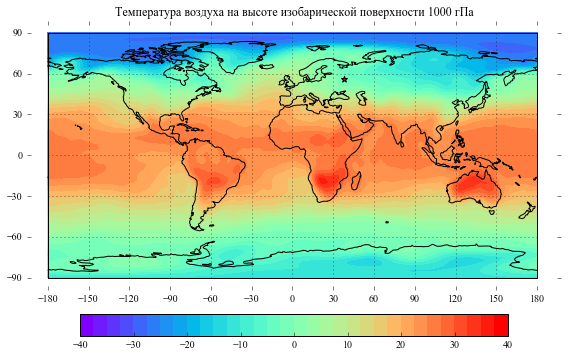

In [13]:
# ЛИСТИНГ 8 Создание карты с помощью модуля Cartopy

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman', 'Ubuntu','Arial','Tahoma','Calibri'

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

bounds = np.arange(-40, 40+2.5, 2.5)
cmap = mpl.cm.get_cmap('rainbow', len(bounds)-1)

cs = ax.contourf(x, y, a, bounds, cmap=cmap,
                 transform=ccrs.PlateCarree())
fig.colorbar(cs, ax=ax, orientation='horizontal', shrink=0.8, pad=0.06)

xticks = range(-180, 180+1, 30)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
yticks = range(-90, 91, 30)
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(xlocs=xticks, ylocs=yticks)
# Moscow
ax.scatter(37.65, 55.75, s=40, marker='*', c='r')
#ax.set_global()
ax.set_title(u'Температура воздуха на высоте изобарической поверхности %d гПа' % level)
plt.tight_layout()
plt.show()

fig.savefig("T%d.png" % level, format='png', dpi=200)